In [22]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [23]:
# 데이터 파일 경로 설정
train_path = '/content/train.csv'
test_path = '/content/test.csv'

# 데이터 파일 읽어오기
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [36]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week_Yearly,Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country_Father,Birth_Country_Mother,Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle 7-8,Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree Vocational,Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing Non-durable,Admin Support include Clerical,Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 MFJ,3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household HOH,0,0,0,Unknown,570


In [24]:
# 특수문자 제거 및 띄어쓰기 '_' 대
train.columns = train.columns.str.replace('(', '', regex=False) \
                               .str.replace(')', '', regex=False) \
                               .str.replace(' ', '_', regex=False)
test.columns = test.columns.str.replace('(', '', regex=False) \
                              .str.replace(')', '', regex=False) \
                              .str.replace(' ', '_', regex=False)

In [25]:

object_cols = list(train.select_dtypes(include=['object']).columns)

# Correctly formatted regex pattern to match the special characters you listed
pattern = r'[#@&\[\]<()]'

# Remove special characters in object columns
for col in object_cols:
    train[col] = train[col].str.replace(pattern, '', regex=True)
    test[col] = test[col].str.replace(pattern, '', regex=True)

In [26]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week_Yearly', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country_Father', 'Birth_Country_Mother', 'Tax_Status', 'Gains',
       'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

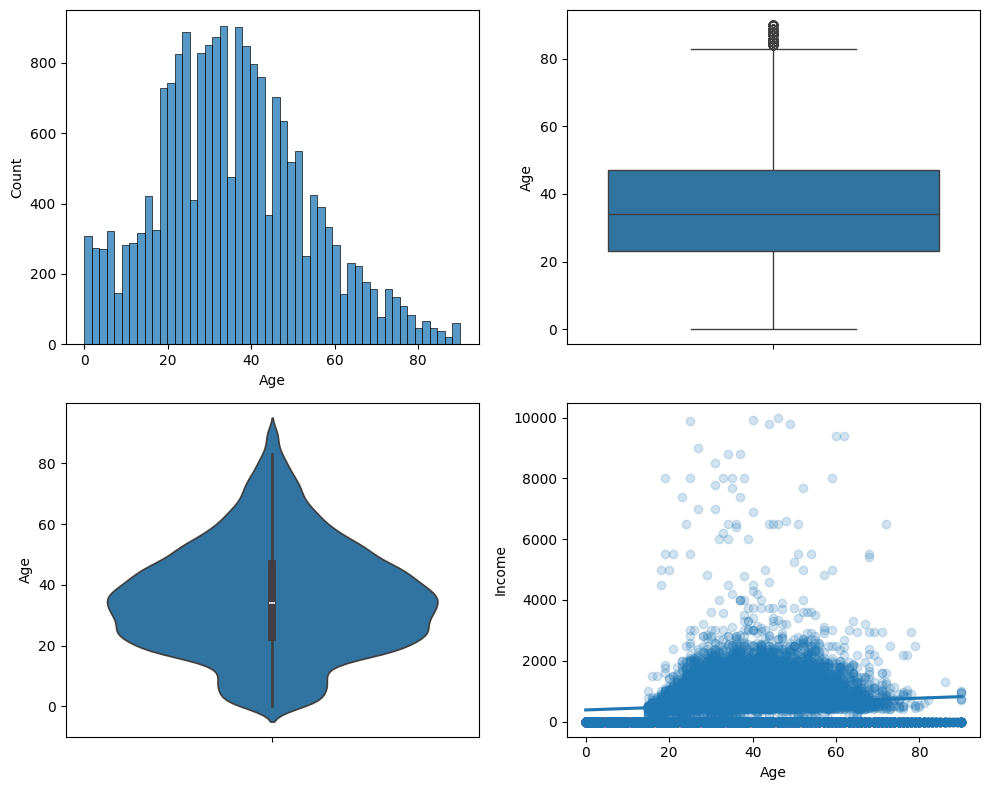

In [27]:
col = train['Age']
f, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.histplot(col, bins=50, ax=ax[0][0])
sns.boxplot(col, ax=ax[0][1])
sns.violinplot(col, ax=ax[1][0])
sns.regplot(x=col, y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[1][1])
plt.tight_layout()

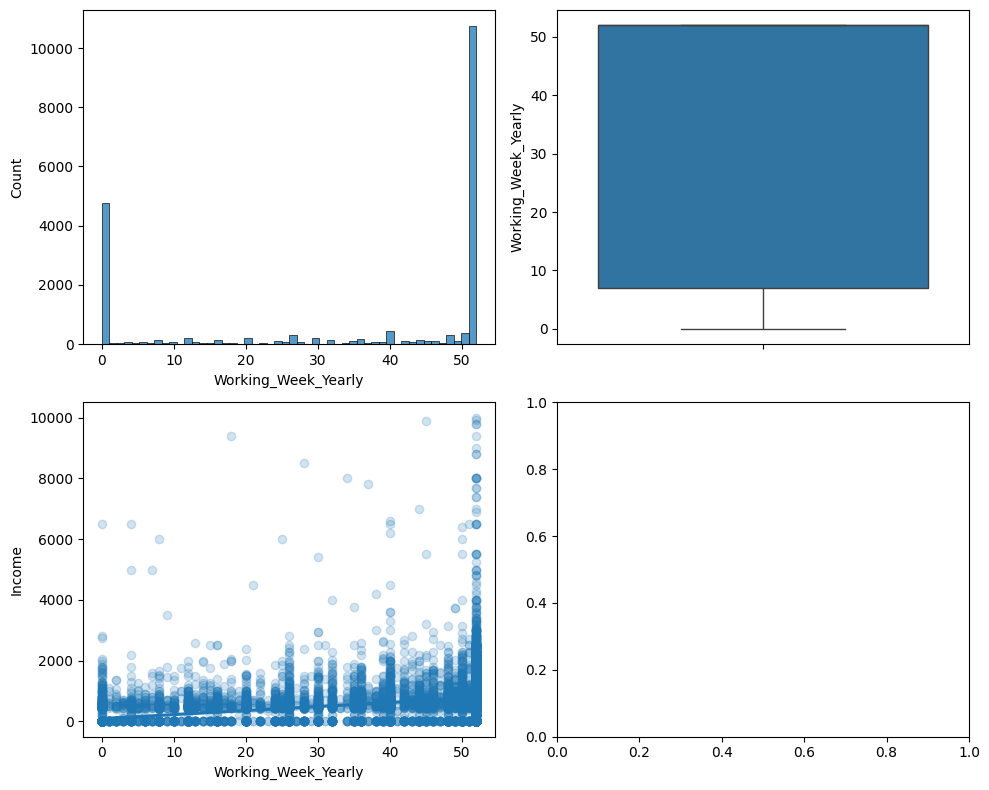

In [32]:
col = train['Working_Week_Yearly']
f, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.histplot(col, bins=50, ax=ax[0][0])
sns.boxplot(col, ax=ax[0][1])
sns.regplot(x=col, y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[1][0])
plt.tight_layout()

<ipython-input-54-be16e5819e23>:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x=col, y=train['Working_Week_Yearly'], ax=ax[1][0])


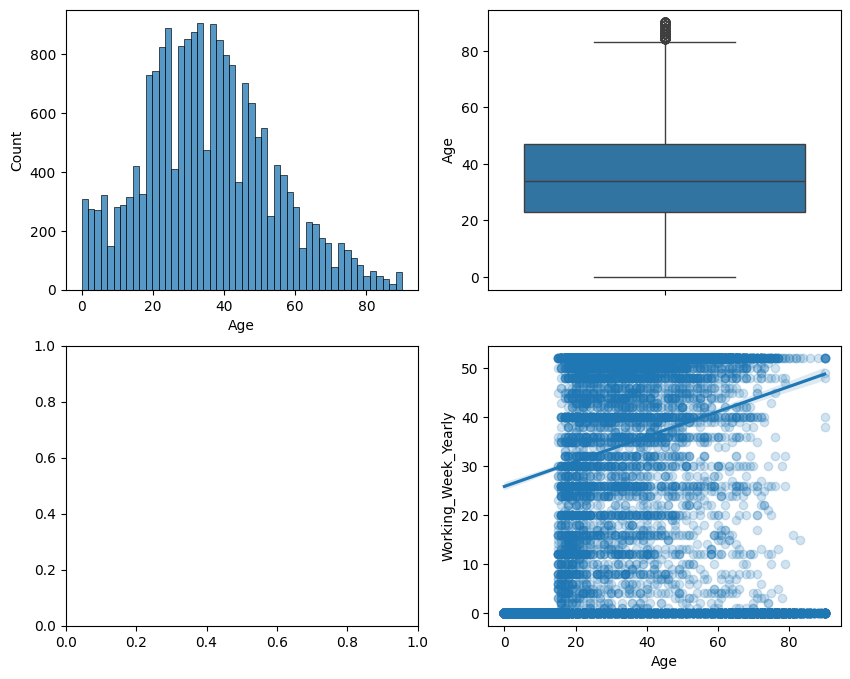

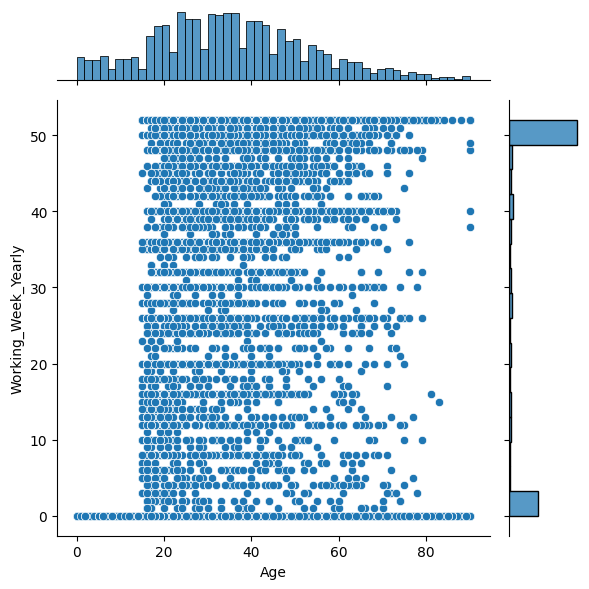

In [54]:
col = train['Age']
f, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.histplot(col, bins=50, ax=ax[0][0])
sns.boxplot(col, ax=ax[0][1])
sns.jointplot(x=col, y=train['Working_Week_Yearly'], ax=ax[1][0])
sns.regplot(x=col, y=train['Working_Week_Yearly'], scatter_kws={'alpha':0.2}, ax=ax[1][1])
plt.tight_layout()

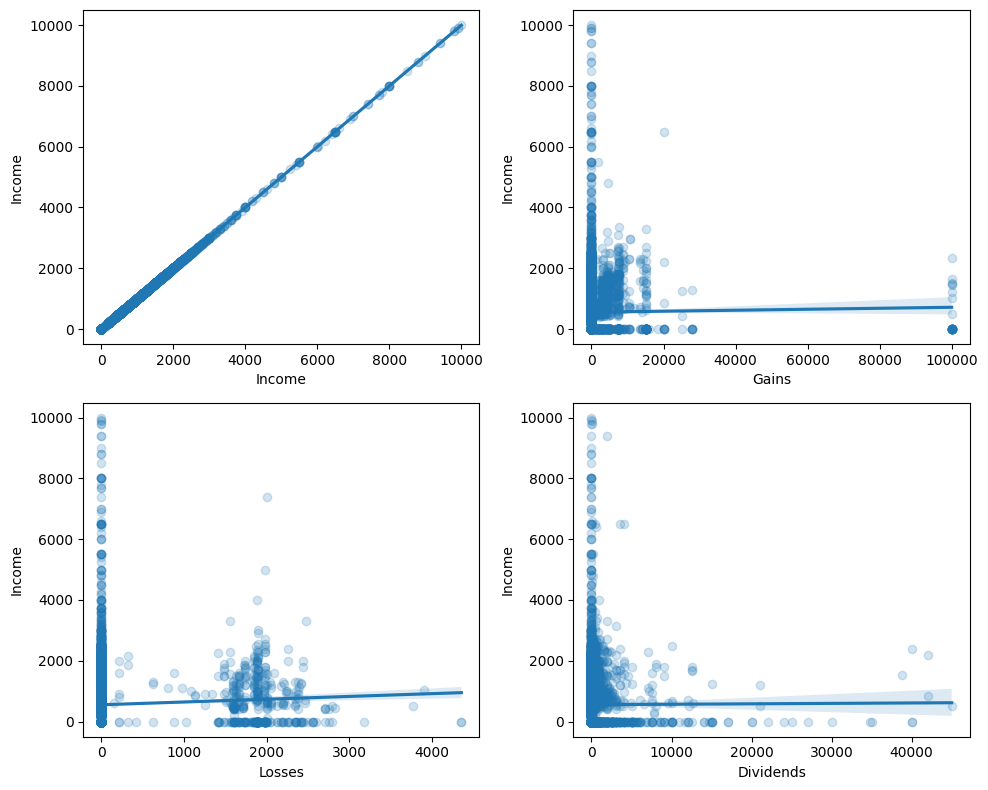

In [45]:
f, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.regplot(x=train['Income'], y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[0][0])
sns.regplot(x=train['Gains'], y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[0][1])
sns.regplot(x=train['Losses'], y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[1][0])
sns.regplot(x=train['Dividends'], y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[1][1])
plt.tight_layout()

<ipython-input-37-7b9ed0169bb1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-37-7b9ed0169bb1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


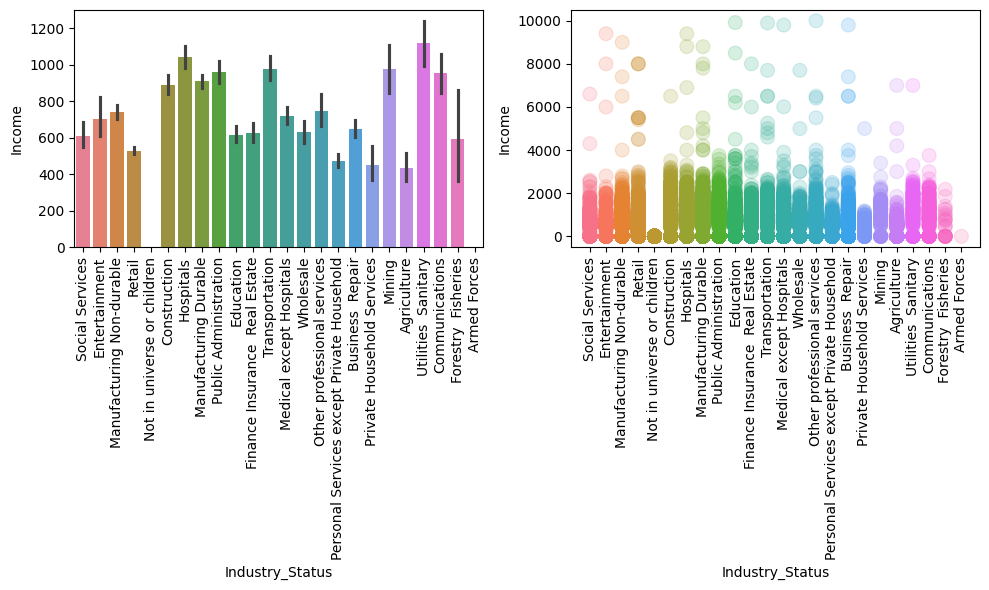

In [37]:
col = train['Industry_Status']
f, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.barplot(x=col, y=train['Income'], hue=col, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.scatterplot(x=col, y=train['Income'], hue=col, alpha=0.2, s= 100, edgecolor=None, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].legend().remove()

plt.tight_layout()

<ipython-input-38-d79422178a6c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-38-d79422178a6c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


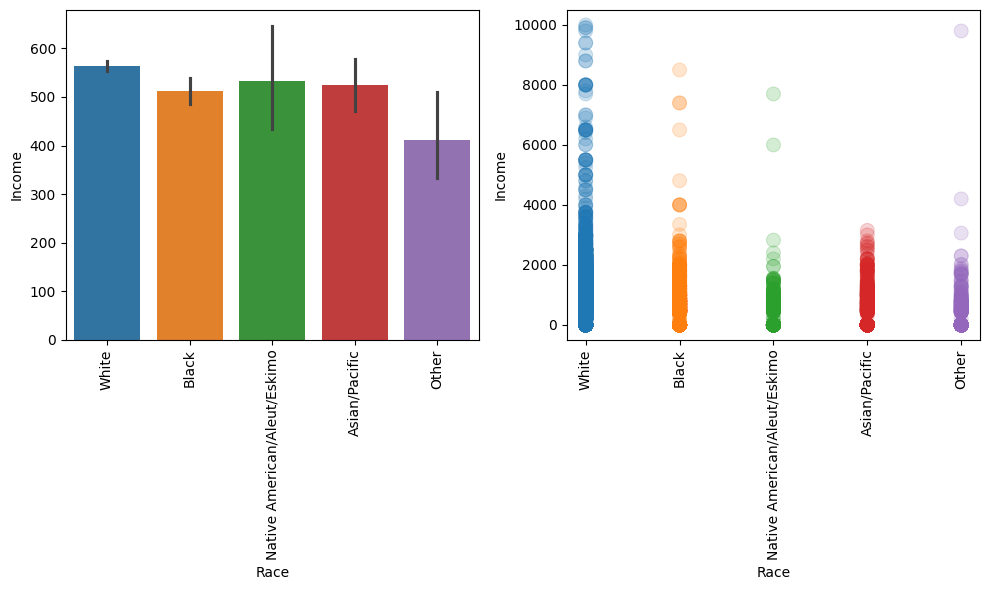

In [38]:
col = train['Race']
f, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.barplot(x=col, y=train['Income'], hue=col, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.scatterplot(x=col, y=train['Income'], hue=col, alpha=0.2, s= 100, edgecolor=None, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].legend().remove()

plt.tight_layout()

<ipython-input-39-ce05a0b70b75>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-39-ce05a0b70b75>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


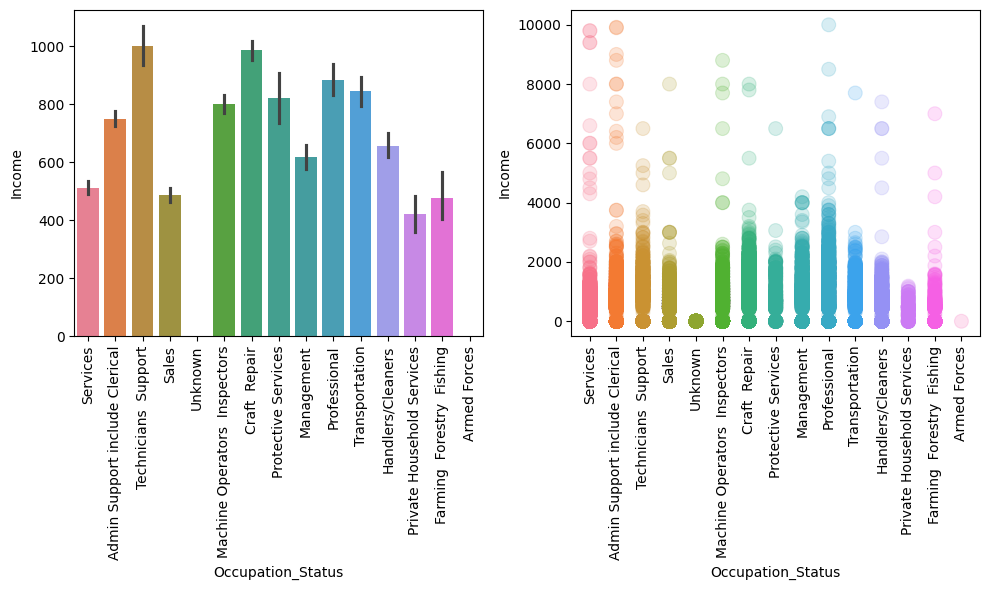

In [39]:
col = train['Occupation_Status']
f, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.barplot(x=col, y=train['Income'], hue=col, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.scatterplot(x=col, y=train['Income'], hue=col, alpha=0.2, s= 100, edgecolor=None, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].legend().remove()

plt.tight_layout()

<ipython-input-40-b3a2475dd827>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-40-b3a2475dd827>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


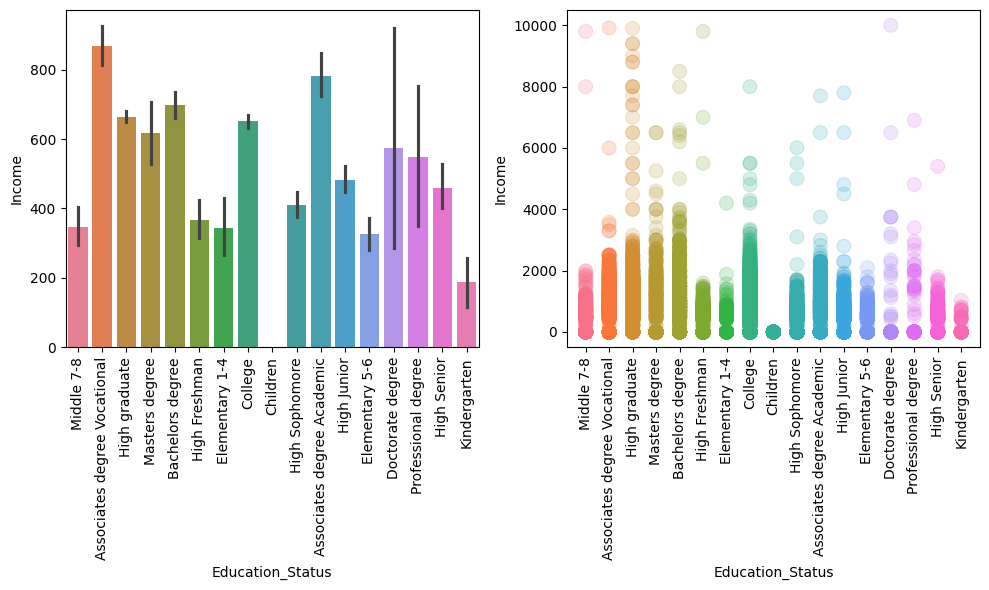

In [40]:
col = train['Education_Status']
f, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.barplot(x=col, y=train['Income'], hue=col, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.scatterplot(x=col, y=train['Income'], hue=col, alpha=0.2, s= 100, edgecolor=None, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].legend().remove()

plt.tight_layout()